## Laura Dooley
 
 7/14/2024

 The project purpose is to predict the gender by using the height, weight, and age features. 

# Lab 3 - Exploring and manipulating data. 
Here is what we we do:
1. Prepare the data
2. Train 3 models
    - Decision Tree
    - SVM using rgb
    - Neural Net
3. Get ,odel performance on train and test sets
4. Create appropriate graphs

### Prepare the data

In [9]:
import pandas as pd

howell_full = pd.read_csv("Howell.csv", sep=";")

# Compute bmi based on height and weight metric units
def bmi(height, weight):
    return 10000*weight/(height**2)

new_feature = bmi(howell_full['height'], howell_full['weight'])
print(new_feature)
howell_full['bmi'] = new_feature
howell_full.head(n=10)





0      20.764297
1      18.695244
2      17.095718
3      21.561444
4      19.520384
         ...    
539    14.720729
540    19.739486
541    22.155341
542    15.917698
543    20.844590
Length: 544, dtype: float64


,height,weight,age,male,bmi
0,151.765,47.825606,63.0,1,20.764297
1,139.700,36.485807,63.0,0,18.695244
2,136.525,31.864838,65.0,0,17.095718
3,156.845,53.041914,41.0,1,21.561444
4,145.415,41.276872,51.0,0,19.520384
5,163.830,62.992589,35.0,1,23.469433
6,149.225,38.243476,32.0,0,17.174108
7,168.910,55.479971,27.0,1,19.445786
8,147.955,34.869885,19.0,0,15.929099
9,165.100,54.487739,54.0,1,19.989625


### A Better Plot

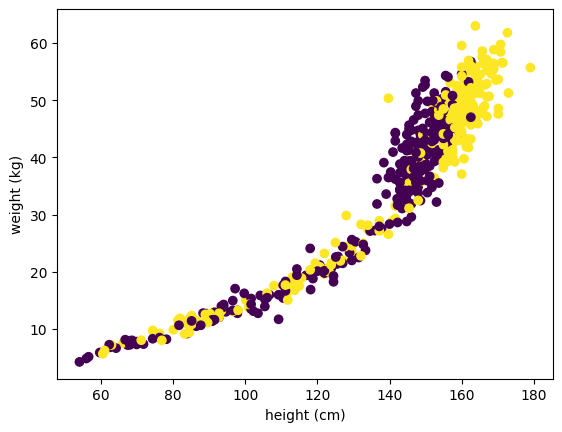

In [4]:
import matplotlib.pyplot as plt

height = howell_full['height']
weight = howell_full['weight']

gender = howell_full['male']
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()


### Splitting the Data by Age

In [7]:
over18 = howell_full["age"] > 18


# Only keep the true instances
howell_adults = howell_full[over18]
howell_children = howell_full[~over18] # ~ is not in numpy



### Plot with Masking
Another way to restrict the instances you use is to apply masking to a numpy array. We replace certain values in the array with a mask. (This is not a NaN... the value is still there, it just won't be used.)

In this plot we are only using the adult instances (howell_adult) and we are going to create masks for male and female  (male is 1 or 0)

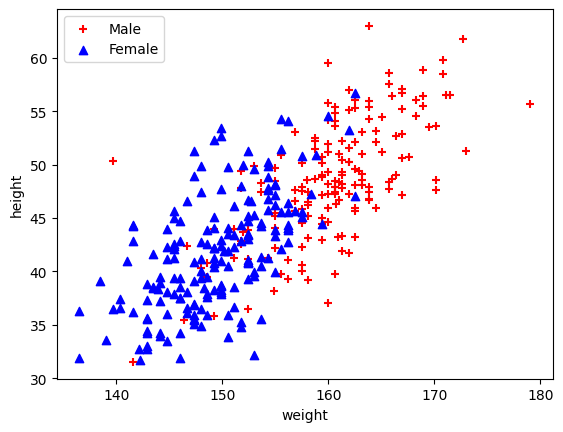

In [10]:
import matplotlib.pyplot as plt
import numpy as np

male_height = np.ma.masked_where(howell_adults['male']==0,
howell_adults['height'])
female_height = np.ma.masked_where(howell_adults['male']==1,
howell_adults['height'])
weight = howell_adults['weight']

plt.scatter(male_height, weight, c='red', marker='+')
plt.scatter(female_height, weight, c='blue', marker='^')
plt.xlabel('weight')
plt.ylabel('height')
plt.legend(['Male', 'Female'])
plt.show()



### Stratified Test/Train Data Split

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2,
random_state=123)
for train_indices, test_indices in splitter.split(howell_adults,
howell_adults['male']):
    
    train_set = howell_adults.iloc[train_indices]
test_set = howell_adults.iloc[test_indices]


### Train and evaluate a Linear Regression Model

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

#X = train_set[['height']]
#X = train_set[['weight']]
X = train_set[['height', 'weight']]
#X = train_set[['age']]
y = train_set['male']

#X_test = test_set[['height']]
#X_test = test_set[['weight']]
X_test = test_set[['height', 'weight']]
#X_test = test_set['age']
y_test = test_set['male']

tree_model = DecisionTreeClassifier()
tree_model.fit(X, y)

y_pred = tree_model.predict(X)
print('Results for decision tree on training data')
print('   Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred))
print('Recall is    ', recall_score(y, y_pred))
print('F1 is        ', f1_score(y, y_pred))

Results for decision tree on training data
   Default settings
Confusion Matrix
[[145   0]
 [  0 131]]
Accuracy is   1.0
Precision is  1.0
Recall is     1.0
F1 is         1.0


In [31]:
y_test_pred = tree_model.predict(X_test)

print('Results for decision tree on test data')
print('  Default settings')
print("Confusion Matrix ")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is  ', precision_score(y_test, y_test_pred))
print('Recall is  ', recall_score(y_test, y_test_pred))
print('F1 is ', f1_score(y_test, y_test_pred))

Results for decision tree on test data
  Default settings
Confusion Matrix 
[[28  9]
 [11 22]]
Accuracy is   0.7142857142857143
Precision is   0.7096774193548387
Recall is   0.6666666666666666
F1 is  0.6875


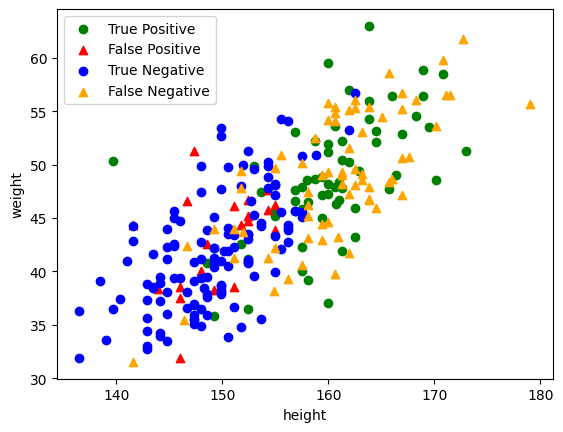

In [33]:
import matplotlib.pyplot as plt

def plot2FeatureBinaryConfusion(data_set, feature1Label, feature2Label, targetLabel, predicted, positive=1, negative=0):
## assumes that the target is 0/1

    
    target = data_set[targetLabel]
    
    # Filter with feature 1
    feature1_positives = np.ma.masked_where(target==negative, 
                     data_set[feature1Label])
    true_positive = np.ma.masked_where(predicted!=target, feature1_positives)
    false_negative = np.ma.masked_where(predicted==target, feature1_positives)
    feature1_negatives = np.ma.masked_where(target==positive, 
                     data_set[feature1Label])
    true_negative = np.ma.masked_where(predicted!=target, feature1_negatives)
    false_positive = np.ma.masked_where(predicted==target,feature1_negatives)

   
    feature2 = data_set[feature2Label]
    plt.scatter(true_positive, feature2, c='green', marker='o')
    plt.scatter(false_positive, feature2, c='red', marker='^')
    plt.scatter(true_negative, feature2, c='blue', marker='o')
    plt.scatter(false_negative, feature2, c='orange', marker='^')



    plt.xlabel(feature1Label)
    plt.ylabel(feature2Label)
    plt.legend(['True Positive', 'False Positive', 'True Negative', 'False Negative'])
    plt.show()

plot2FeatureBinaryConfusion(train_set, 'height', 'weight', 'male', y_pred)

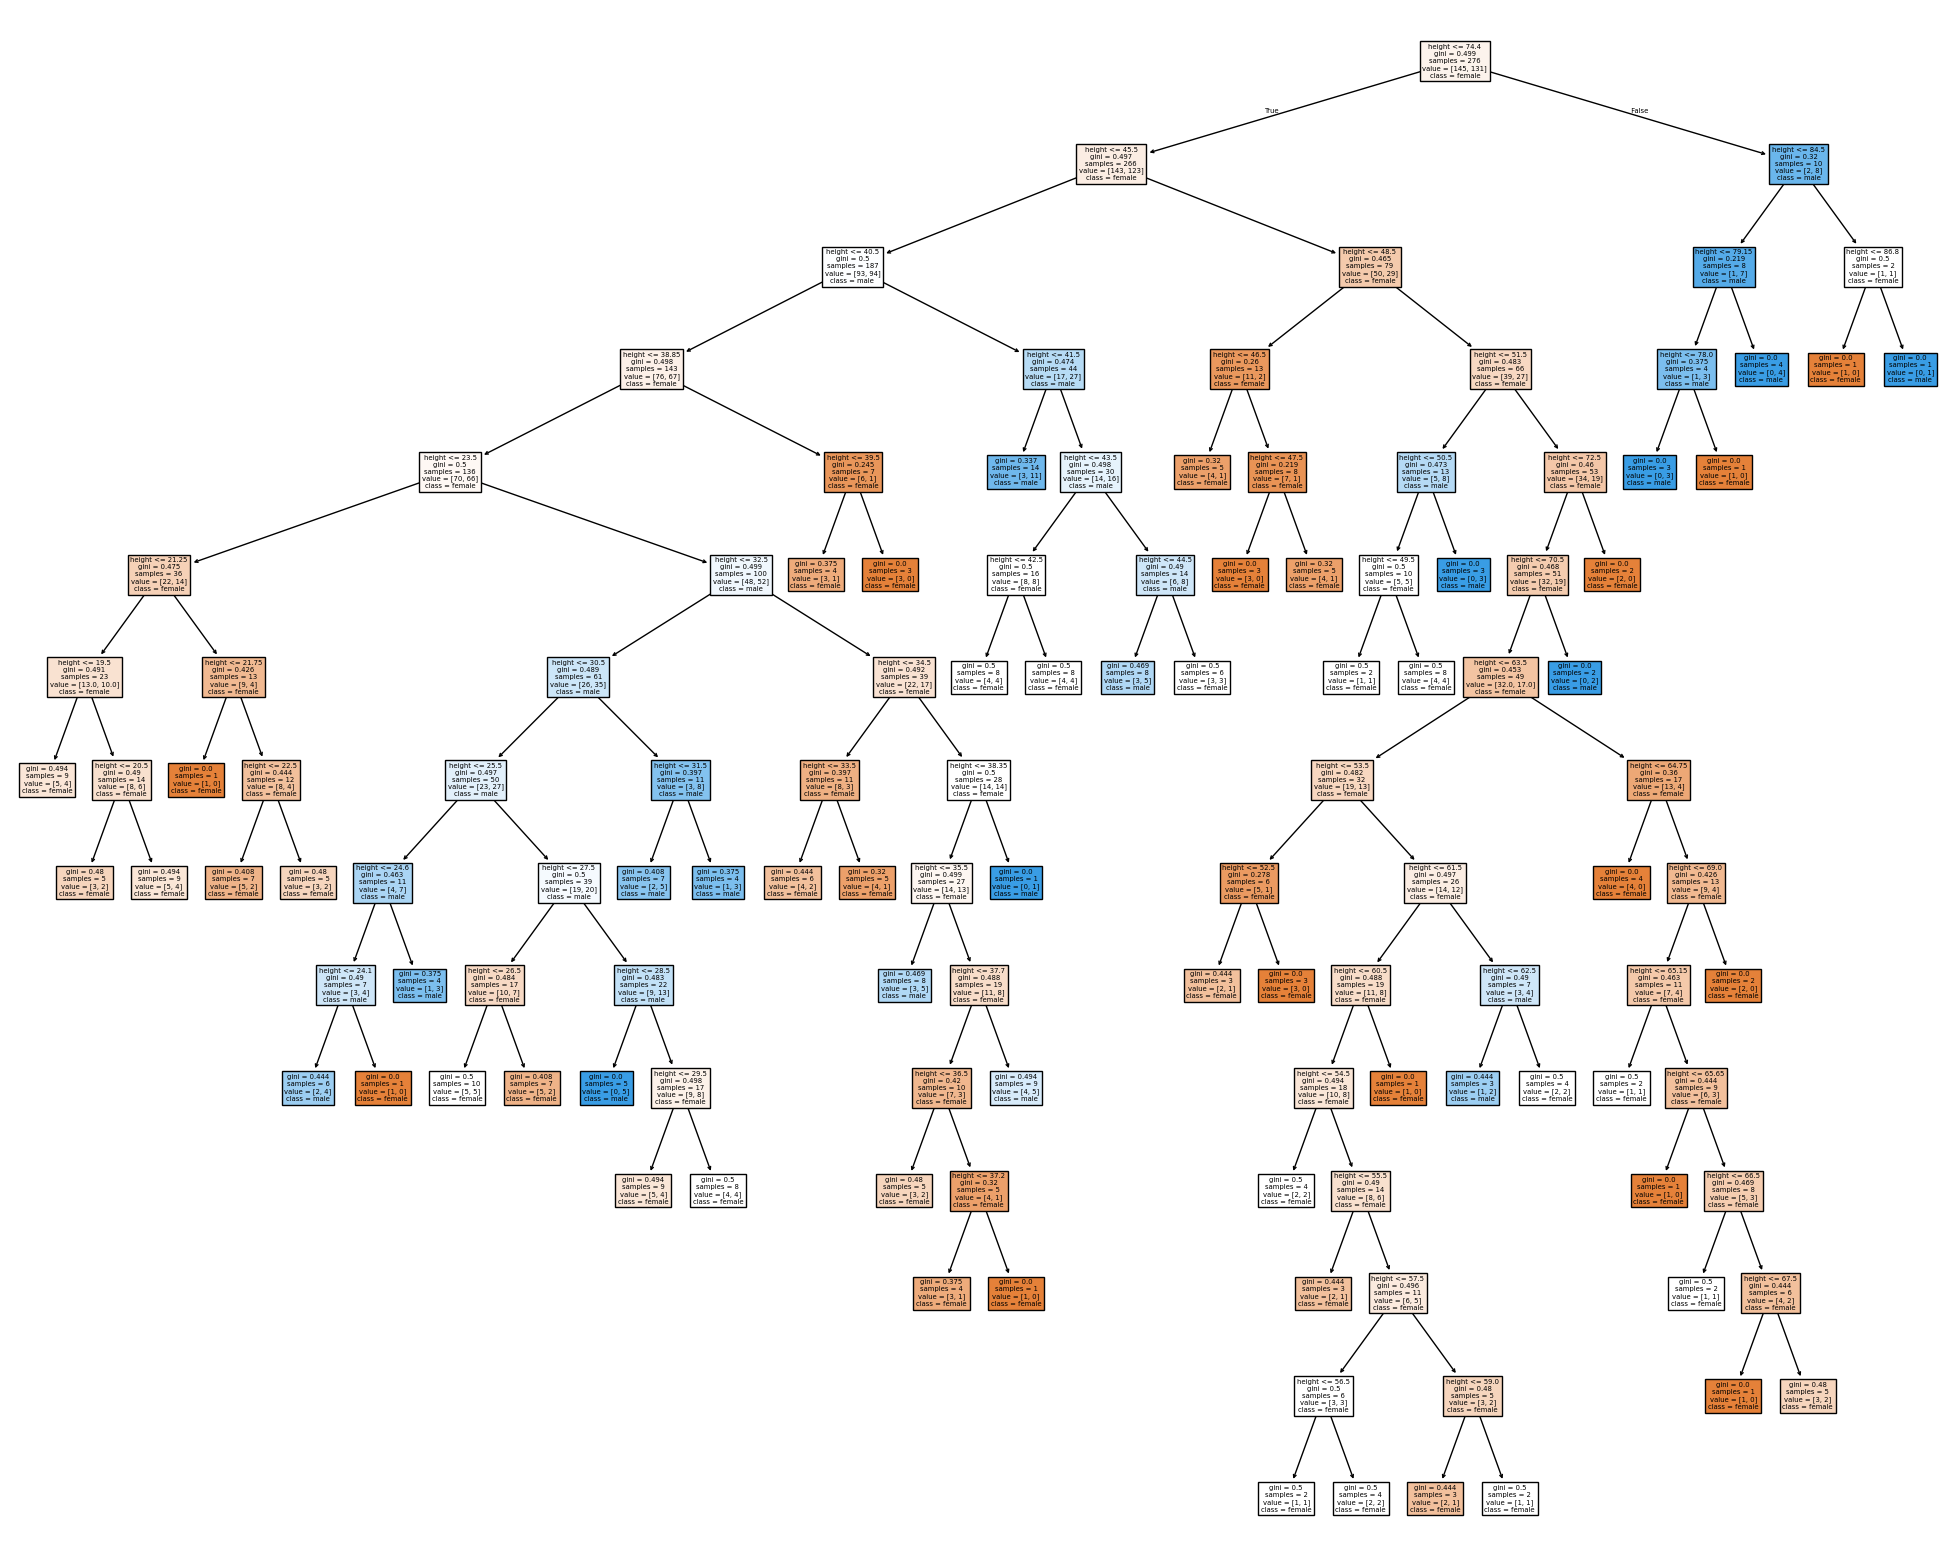

In [34]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
plot_tree(tree_model, 
          feature_names=['height', 'weight'],
          class_names= ['female', 'male'],
          filled=True)
fig.savefig("decision_tree_howell.png")


In [38]:
### Train and evaluate SVC model

from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X, y)

y_pred = svc_model.predict(X)
print('Results for svc on straining data')
print('   Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred))
print('Recall is    ', recall_score(y, y_pred))
print('F1 is        ', f1_score(y, y_pred))

y_test_pred = svc_model.predict(X_test)
print('Results for svc on test data')
print('  Default settings')
print("Confusion Matrix ")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is  ', precision_score(y_test, y_test_pred))
print('Recall is  ', recall_score(y_test, y_test_pred))
print('F1 is ', f1_score(y_test, y_test_pred))

Results for svc on straining data
   Default settings
Confusion Matrix
[[126  19]
 [ 23 108]]
Accuracy is   0.8478260869565217
Precision is  0.8503937007874016
Recall is     0.8244274809160306
F1 is         0.8372093023255814
Results for svc on test data
  Default settings
Confusion Matrix 
[[29  8]
 [ 8 25]]
Accuracy is   0.7714285714285715
Precision is   0.7575757575757576
Recall is   0.7575757575757576
F1 is  0.7575757575757576


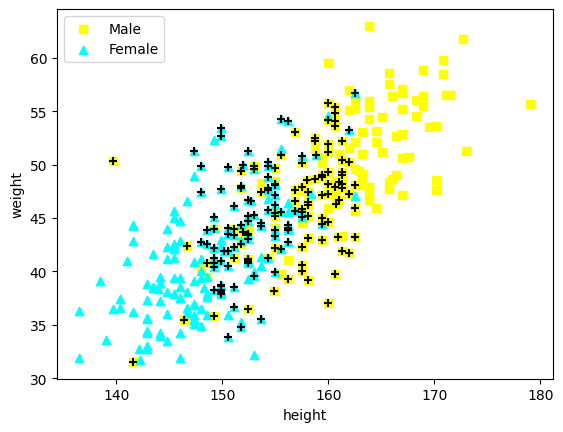

In [49]:
import matplotlib.pyplot as plt
male_height = np.ma.masked_where(howell_adults['male']==0,
howell_adults['height'])
female_height = np.ma.masked_where(howell_adults['male']==1,
howell_adults['height'])
weight = howell_adults['weight']

# get the values for the support vectors (the special instances)
support_x = [x for (x,y) in svc_model.support_vectors_]
support_y = [y for (x,y) in svc_model.support_vectors_]

plt.scatter(male_height, weight, c='yellow', marker='s')
plt.scatter(female_height, weight, c='cyan', marker='^')
plt.scatter(support_x, support_y, c='black', marker='+')
plt.xlabel('height')
plt.ylabel('weight')
plt.legend(['Male', 'Female'])
plt.show()



In [48]:
## Train and evaluate Neural Net model
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X,y)
y_pred = nn_model.predict(X)
print('Results for nn on training data')
print('   Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred))
print('Recall is    ', recall_score(y, y_pred))
print('F1 is        ', f1_score(y, y_pred))

y_test_pred = nn_model.predict(X_test)
print('Results for nn on test data')
print('  Default settings')
print("Confusion Matrix ")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is  ', precision_score(y_test, y_test_pred))
print('Recall is  ', recall_score(y_test, y_test_pred))
print('F1 is ', f1_score(y_test, y_test_pred))

Results for nn on training data
   Default settings
Confusion Matrix
[[127  18]
 [ 21 110]]
Accuracy is   0.8586956521739131
Precision is  0.859375
Recall is     0.8396946564885496
F1 is         0.8494208494208494
Results for nn on test data
  Default settings
Confusion Matrix 
[[29  8]
 [ 6 27]]
Accuracy is   0.8
Precision is   0.7714285714285715
Recall is   0.8181818181818182
F1 is  0.7941176470588235


# Results 
Basic results for our classification model to predict gender 
on the Howell data.

|  Model  |  Training Features  |  Set  | Accuracy  |  F1  |
|  :---  |  :---  |  :---  | :--- |  :---  |
|  Decision Tree  |  Height  |  Training  | 89.85  |  88.62  |
|  Decision Tree  |  Height  |  Test  |  81.43  |  78.69  |
|  Decision Tree  |  Weight  |  Training  | 96.01  |  95.62  |
|  Decision Tree  |  Weight  |  Test  |  62.86  |  59.38  |
|  Decision Tree  |  Height, Weight  |  Training  | 100  |  100  |
|  Decision Tree  |  Height, Weight  |  Test  |  71.43  |  66.67  |
| SVC |  Height, Weight  |  Training  | 84.78  |  83.72  |
|  SVC  |  Height, Weight  |  Test  |  77.14  |  75.76  |
| MLP |  Height, Weight, (50, 25, 10) lbsfgs |  Training  | 85.87  |  84.94 |
|  MLP  |  Height, Weight  (50, 25, 10) lbsfgs|  Test  |  80.00  |  79.41  |